In [1]:
import os

from wpg.wpg_uti_wf import plot_intensity_map

from felpy.model.tools import scale
from felpy.model.core.wavefront import Wavefront
from felpy.model.beamlines.exfel_spb.methods import setup_spb
from felpy.analysis.dataset import Dataset

from labwork.about import dCache

from felpy.model.core.beamline import Beamline
from wpg.optical_elements import Aperture
from felpy.model.tools import propagation_parameters


In [3]:

def scale_this(wfr, nx = 512, ny = 512):
    """
    narrow functionality for scaling a wavefront (ie the number of pixels)
    in the source plane

    :param wfr: wpg wfr strucutre
    :param isc: ideal scale
    :param ifov: ideal field of view

    :returns wfr: scaled wpg wfr structure
    """

    ix, iy = wfr.params.Mesh.nx, wfr.params.Mesh.ny
    dx, dy = wfr.params.Mesh.xMax-wfr.params.Mesh.xMin, wfr.params.Mesh.yMax-wfr.params.Mesh.yMin

    print(800e-06/dx,ix,800e-06/dy,iy)
    scbl = Beamline()
    scbl.append(Aperture('r','a', 800e-06, 800e-06), propagation_parameters(800e-06/dx, nx/ix, 800e-06/dx, ny/iy))

    #scbl.propagate(wfr)

    return wfr

from felpy.model.src.coherent import construct_SA1_wavefront
wfr = construct_SA1_wavefront(512,512,5,0.2)
scale(wfr)

ModuleNotFoundError: No module named 'felpy.model.src.coherent'

Radiation:
	Mesh:
		hvx = 1
		hvy = 0
		hvz = 0
		nSlices = 2250
		nvx = 0
		nvy = 0
		nvz = 1
		nx = 201
		ny = 201
		qxMax = None
		qxMin = None
		qyMax = None
		qyMin = None
		sliceMax = 5021.979923170466
		sliceMin = 4897.964934549133
		xMax = 0.0006024679751135409
		xMin = -0.0006024679751135409
		yMax = 0.0006024679751135409
		yMin = -0.0006024679751135409
		zCoord = 0.0
		
	Rx = 5.0
	Ry = 5.0
	dRx = 0.125
	dRy = 0.125
	nSlices = 2250
	nval = 2
	nx = 201
	ny = 201
	photonEnergy = 4960.0
	wDomain = frequency
	wEFieldUnit = sqrt(J/eV/mm^2)
	wFloatType = float
	wSpace = R-space
	xCentre = 0.0
	yCentre = 0.0
	
	arrEhor = array of shape (201, 201, 2250, 2) // the 2-nd dimension is (re,im)
	arrEver = array of shape (201, 201, 2250, 2) // the 2-nd dimension is (re,im)



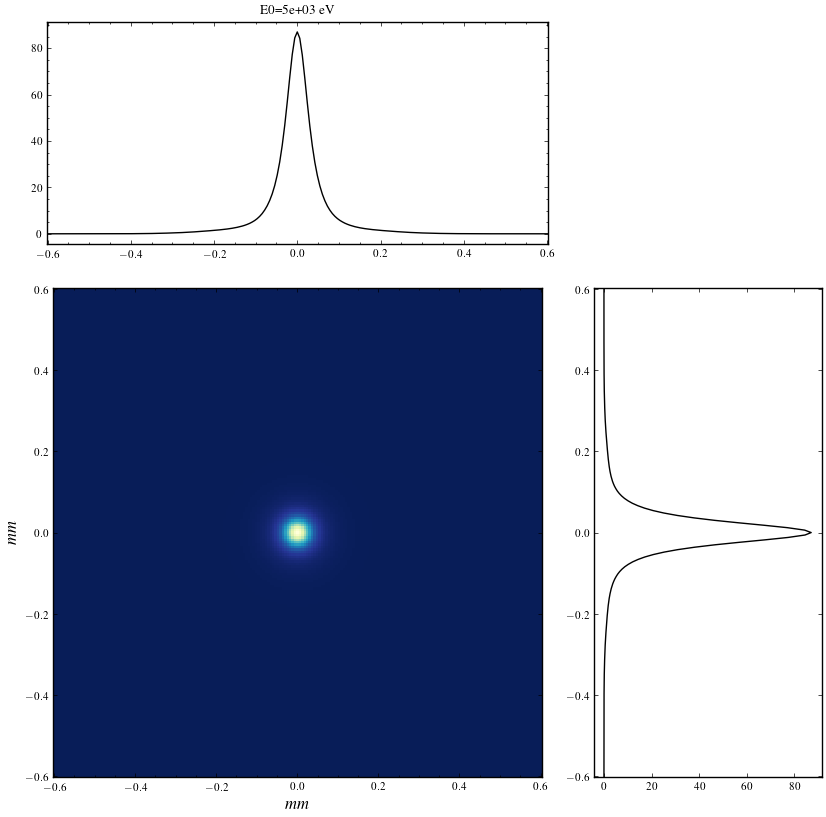

(1.6513149724700866e-06, 1.6513149724700866e-06)

In [5]:
DLOC = dCache + "NanoKB-Pulse/source/"

## load wpg wavefront
wfr = Wavefront()
wfr.load_hdf5(DLOC + "/NanoKB-Pulse_12.h5")
wfr.set_electric_field_representation('frequency')
print(wfr)
plot_intensity_map(wfr)
wfr.get_fwhm()
wfr.get_divergence()
## wavefile specific scale ## bad practice, should be in first prop.
#scale_this(wfr)


In [6]:
wfr.custom_fields

{'history': {'parent': {'info': {'data_description': array([b'Objective:\n', b'\n',
           b'Input data for start-to-end x-ray free-electron laser simulation of a single\n',
           b'particle experiment\n', b'\n', b'Date: 04.09.2014\n', b'\n',
           b'M.V. Yurkov: mikhail.yurkov@desy.de\n',
           b'E.A. Schneidmiller: evgeny.schneidmiller@desy.de\n',
           b'tel. 2676\n', b'\n', b'======================\n', b'\n',
           b'SASE1/2\n', b'Electron energy = 12 GeV\n',
           b'Wavelength 0.25 nm (5 keV)\n',
           b'Bunch parameters: 250 pC, baseline parameters (DESY 11-152)\n',
           b'Simulation code: FAST\n', b'Actual number of particles\n',
           b'Azimuthal harmonics: -1...1\n',
           b'Undulator structure with gaps\n', b'===\n', b'\n',
           b'File name: XFEL_S1_04.96keV_12.0GeV_0250pC_SASE_U_BLI_2014-09-04_FAST_\n',
           b'\n', b'Number of simulation runs: 70\n', b'\n', b'===\n', b'\n',
           b'Output points along un

wfr.custom_fields

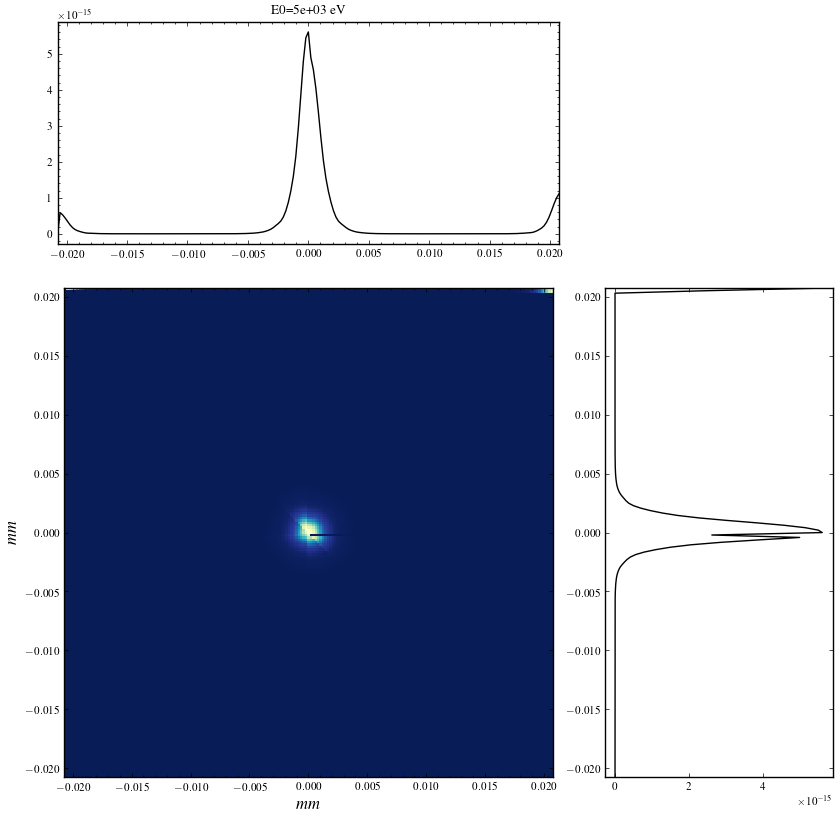

Radiation:
	Mesh:
		hvx = 1
		hvy = 0
		hvz = 0
		nSlices = 2250
		nvx = 0
		nvy = 0
		nvz = 1
		nx = 201
		ny = 201
		qxMax = 82991.96316713268
		qxMin = -82991.96316713268
		qyMax = 82991.96316713268
		qyMin = -82991.96316713268
		sliceMax = 5021.979923170466
		sliceMin = 4897.964934549133
		xMax = None
		xMin = None
		yMax = None
		yMin = None
		zCoord = 0.0
		
	Rx = 5.0
	Ry = 5.0
	dRx = 0.125
	dRy = 0.125
	nSlices = 2250
	nval = 2
	nx = 201
	ny = 201
	photonEnergy = 4960.0
	wDomain = frequency
	wEFieldUnit = sqrt(J/eV/mm^2)
	wFloatType = float
	wSpace = Q-space
	xCentre = 0.0
	yCentre = 0.0
	
	arrEhor = array of shape (201, 201, 2250, 2) // the 2-nd dimension is (re,im)
	arrEver = array of shape (201, 201, 2250, 2) // the 2-nd dimension is (re,im)



In [4]:
plot_intensity_map(wfr)
print(wfr)

In [ ]:

## load bl object (get_beamline object is a static method of the beamline class)
spb = setup_spb(parameter_file = "/gpfs/exfel/data/user/guestt/FELpy/felpy/data/params/spb-sfx_nkb_FAST.json", theta_KB = 5e-03, theta_HOM = 3.5e-03)#bl = spb.bl
bl = spb.bl

## EXEC
bl.propagate_sequential(wfr)

Initialising Single Particle Beamline


In [ ]:
wfr.store_hdf5(dCache + "updated_NVE.h5")

In [ ]:
from felpy.model.core.beamline import Beamline
from wpg.optical_elements import Drift

wfr = Wavefront()
wfr.load_hdf5(dCache + "updated_NVE.h5")
bl = Beamline()

bl.append(Drift(2.2), propagation_parameters(1,1,1,1,'converge'))
    
bl.propagate(wfr)

In [ ]:
plot_intensity_map(wfr)

In [ ]:
print(wfr)